# Lets build a dataset which only considers 1h time steps starting on 01-01-2020 00:00
### Goal: figure out how much data we would lose


Steps:
load whole data of cleaned_stations_GOM


In [1]:
import pandas as pd
import numpy as np
from IPython.core.display_functions import display

#Display all values of dataframes:
#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None)  # or 1000
#pd.set_option('display.max_colwidth', None)  # or 199

# = cleaned_stations_GOM ... includes only buoys which do have data for 2020. Calculated in timestamp_analysis.ipynb
cleaned_stations_GOM = ['41117',
 '41112',
 '42001',
 '42002',
 '42012',
 '42013',
 '42019',
 '42020',
 '42022',
 '42023',
 '42026',
 '42036',
 '42039',
 '42040',
 '42055',
 '42095',
 '42097',
 '42098',
 '42099',
 'amrl1',
 'anpt2',
 'apcf1',
 'arpf1',
 'awrt2',
 'babt2',
 'bktl1',
 'bsca1',
 'burl1',
 'bygl1',
 'bzst2',
 'capl1',
 'carl1',
 'cdrf1',
 'cnbf1',
 'crta1',
 'cwaf1',
 'cwbf1',
 'dmsf1',
 'ebef1',
 'einl1',
 'emat2',
 'eptt2',
 'fhpf1',
 'fmoa1',
 'fmrf1',
 'fpst2',
 'frdf1',
 'gbif1',
 'gctf1',
 'gisl1',
 'gkyf1',
 'gnjt2',
 'grrt2',
 'gtot2',
 'hist2',
 'href1',
 'irdt2',
 'jxuf1',
 'ktnf1',
 'kywf1',
 'lcll1',
 'lmrf1',
 'ltjf1',
 'luit2',
 'mbet2',
 'mbpa1',
 'mcga1',
 'mgpt2',
 'mhbt2',
 'mtbf1',
 'mypf1',
 'ncht2',
 'nfdf1',
 'nuet2',
 'nwcl1',
 'obla1',
 'optf1',
 'pacf1',
 'pact2',
 'pcbf1',
 'pcgt2',
 'pclf1',
 'pcnt2',
 'pill1',
 'pmaf1',
 'pmnt2',
 'pnlm6',
 'port2',
 'pstl1',
 'ptat2',
 'ptbm6',
 'ptit2',
 'ptoa1',
 'rcpt2',
 'rlit2',
 'rlot2',
 'rsjt2',
 'rtat2',
 'sapf1',
 'sauf1',
 'sdrt2',
 'sgnt2',
 'sgof1',
 'shbl1',
 'shpf1',
 'skcf1',
 'smkf1',
 'sref1',
 'srst2',
 'taqt2',
 'tesl1',
 'tlvt2',
 'tpaf1',
 'tshf1',
 'txpt2',
 'txvt2',
 'utvt2',
 'vcaf1',
 'vcat2',
 'venf1',
 'wiwf1',
 'wplf1',
 'wycm6']
len(cleaned_stations_GOM)


#cleaned_stations_GOM = [ '41117', '41112', '42001']  #for debugging!

123

Functions copied from buoy_data.ipynb

In [2]:
#get stdmet (=Standard Meteorological) data by station and year
#Params: station_number: string, year: string
#return: if exists: tuple(station_number: str, data: dataframe
def get_data_file(station_number, year):
    base_url ="https://www.ndbc.noaa.gov/data/historical/stdmet/"
    filename = station_number +"h"+ year + ".txt.gz"
    url = base_url + filename
    #print(url)

    try:
        df_data = pd.read_csv(url, delim_whitespace=True, low_memory=False)
        return station_number, df_data    #return as tuple
    except BaseException as e:
        print('Failed to get file: {}'.format(e))
        return None


def df_modification(data):
    filename = data[0]
    df = data[1]
    df = df.drop(labels=0, axis=0) #drop row with units

    #replace time columns with timestamp index
    df['timestamp'] =  df['#YY'] +"-" \
                       + df['MM'] +"-"  \
                       + df['DD'] +" " \
                       + df['hh'] +":"\
                       + df['mm']
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M')
    df.drop(columns=['#YY', 'MM', 'DD', 'hh', 'mm'], inplace=True)
    df.set_index('timestamp', inplace = True)

    df.columns += "_"+filename #rename columns

    return filename, df


#The function build_dataset(station_numbers, year) builds a dataset for one specific year considering the given station numbers. Each instance uses a timestamp (index) as identifier. Features are all features from all stations. (station id is stored in column name). One instance should represent the state of an area (given by station numbers) at a certain timestamp. This can be used to forecast future states of the same region.
def build_dataset(station_numbers, year):
    dataframes = list()

    for station_number in station_numbers:
        data = get_data_file(station_number, year)  #load file

        if data is not None: #is redundant since I use a filtered list ob buoys ... but I will not remove it to have doubled security
            current_df = df_modification(data)[1]   #[1] ... df and not the whole tuple
            current_df = current_df.loc[~current_df.index.duplicated(keep='first')]
            dataframes.append(current_df)

    merged_data = pd.concat(dataframes, axis=1, join="outer")   #outer join also includes NaN, inner join removes them
    return merged_data

In [3]:
#def display_whole_df(df):
#    with pd.option_context('display.max_rows', dataset_not_cleaned.shape[0],
#                       'display.max_columns', dataset_not_cleaned.shape[1],
#                       'display.precision', 2,
#                       ):
#        print(dataset_not_cleaned)
#Somehow, executing this takes forever

In [4]:
dataset_not_cleaned = build_dataset(cleaned_stations_GOM, "2020")

#Save original data to CSV
dataset_not_cleaned.to_csv(r"../data/NDBC_historical_stdmet_GOM_2020_original.csv")

In [5]:
dataset_not_cleaned

,WDIR_41117,WSPD_41117,GST_41117,WVHT_41117,DPD_41117,APD_41117,MWD_41117,PRES_41117,ATMP_41117,WTMP_41117,...,WVHT_wycm6,DPD_wycm6,APD_wycm6,MWD_wycm6,PRES_wycm6,ATMP_wycm6,WTMP_wycm6,DEWP_wycm6,VIS_wycm6,TIDE_wycm6
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,999,99.0,99.0,0.59,13.33,4.51,78,9999.0,999.0,17.4,...,99.00,99.00,99.00,999,1020.4,12.5,15.5,999.0,99.0,99.00
2020-01-01 00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.00,99.00,99.00,999,1020.4,12.4,15.5,999.0,99.0,99.00
2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.00,99.00,99.00,999,1020.5,12.2,15.5,999.0,99.0,99.00
2020-01-01 00:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.00,99.00,99.00,999,1020.6,12.2,15.5,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:42:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.00,99.00,99.00,999,9999.0,21.2,17.6,999.0,99.0,99.00
2020-12-31 23:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.00,99.00,99.00,999,9999.0,21.1,17.5,999.0,99.0,99.00
2020-12-31 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from datetime import datetime, timedelta
def create_valid_timestamp_list():
    current_ts = datetime.strptime("2020-01-01 00:00", '%Y-%m-%d %H:%M')
    last_timestamp = datetime.strptime("2021-01-01 00:00", '%Y-%m-%d %H:%M')

    timestamps = list()
    while current_ts != last_timestamp:
        timestamps.append(current_ts)
        current_ts = current_ts + timedelta(hours=1)

    return timestamps

In [7]:
timestamp_filter_list = create_valid_timestamp_list()
timestamp_filter_list
#Filter DF by list of inexes
#df = df.filter(items = [2,5], axis=0)

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 1, 0),
 datetime.datetime(2020, 1, 1, 2, 0),
 datetime.datetime(2020, 1, 1, 3, 0),
 datetime.datetime(2020, 1, 1, 4, 0),
 datetime.datetime(2020, 1, 1, 5, 0),
 datetime.datetime(2020, 1, 1, 6, 0),
 datetime.datetime(2020, 1, 1, 7, 0),
 datetime.datetime(2020, 1, 1, 8, 0),
 datetime.datetime(2020, 1, 1, 9, 0),
 datetime.datetime(2020, 1, 1, 10, 0),
 datetime.datetime(2020, 1, 1, 11, 0),
 datetime.datetime(2020, 1, 1, 12, 0),
 datetime.datetime(2020, 1, 1, 13, 0),
 datetime.datetime(2020, 1, 1, 14, 0),
 datetime.datetime(2020, 1, 1, 15, 0),
 datetime.datetime(2020, 1, 1, 16, 0),
 datetime.datetime(2020, 1, 1, 17, 0),
 datetime.datetime(2020, 1, 1, 18, 0),
 datetime.datetime(2020, 1, 1, 19, 0),
 datetime.datetime(2020, 1, 1, 20, 0),
 datetime.datetime(2020, 1, 1, 21, 0),
 datetime.datetime(2020, 1, 1, 22, 0),
 datetime.datetime(2020, 1, 1, 23, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 2, 1, 0)

2020 was a leapyear (=Schaltjahr #German) so it has 366 days. Therefore, there should be 366 * 24 = 8784  timestamps.

In [8]:
len(timestamp_filter_list)

8784

In [9]:
#remove all instances which do not represent a 1h-timestamp
def filter_data(df):
    ts_list = create_valid_timestamp_list()
    df = df.filter(items = ts_list, axis=0)
    return df

In [10]:
dataset_cleaned = filter_data(dataset_not_cleaned)
dataset_cleaned

,WDIR_41117,WSPD_41117,GST_41117,WVHT_41117,DPD_41117,APD_41117,MWD_41117,PRES_41117,ATMP_41117,WTMP_41117,...,WVHT_wycm6,DPD_wycm6,APD_wycm6,MWD_wycm6,PRES_wycm6,ATMP_wycm6,WTMP_wycm6,DEWP_wycm6,VIS_wycm6,TIDE_wycm6
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,999,99.0,99.0,0.59,13.33,4.51,78,9999.0,999.0,17.4,...,99.00,99.00,99.00,999,1020.4,12.5,15.5,999.0,99.0,99.00
2020-01-01 01:00:00,999,99.0,99.0,0.57,14.29,4.41,80,9999.0,999.0,17.4,...,99.00,99.00,99.00,999,1020.5,11.3,15.5,999.0,99.0,99.00
2020-01-01 02:00:00,999,99.0,99.0,0.49,14.29,4.58,69,9999.0,999.0,17.4,...,99.00,99.00,99.00,999,1020.9,10.9,15.6,999.0,99.0,99.00
2020-01-01 03:00:00,999,99.0,99.0,0.52,7.69,4.23,98,9999.0,999.0,17.4,...,99.00,99.00,99.00,999,1020.9,10.3,15.6,999.0,99.0,99.00
2020-01-01 04:00:00,999,99.0,99.0,0.51,15.38,3.79,62,9999.0,999.0,17.4,...,99.00,99.00,99.00,999,1021.0,9.5,15.5,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.00,99.00,99.00,999,9999.0,22.2,999.0,999.0,99.0,99.00
2020-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.00,99.00,99.00,999,9999.0,22.0,17.0,999.0,99.0,99.00
2020-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.00,99.00,99.00,999,9999.0,21.0,16.9,999.0,99.0,99.00


Why are there only 8777 rows? What happened to the missing 7 rows?

In [11]:
def print_NaN_statistic(df, heading):
    print("\n",heading)
    num_values = df.shape[0] * df.shape[1]
    print("number of values: ", num_values)
    num_NaN = df.isna().sum().sum()
    num_NaN_percentage = round(100* num_NaN / num_values, 2)
    print("number of NaN values: ", num_NaN, "(",num_NaN_percentage,"%)\n")

    # Print percentage of NaN values per pprint_column
    num_of_rows =  len(df.index)
    count_NaN = list()
    percentage_NaN = list()
    features = list()
    for column in df:
        current_num_of_NaN = df[column].isna().sum()
        current_percentage_of_NaN = round(100 * current_num_of_NaN / num_of_rows, 2)

        features.append(column)
        count_NaN.append(current_num_of_NaN)
        percentage_NaN.append(current_percentage_of_NaN)

    NaN_by_feature = pd.DataFrame({'Feature':features,'#NaN':count_NaN, '%NaN':percentage_NaN})
    #display(NaN_by_feature)

    return num_values, num_NaN_percentage, NaN_by_feature


print_NaN_statistic(dataset_not_cleaned, "Complete Dataset:")
print_NaN_statistic(dataset_cleaned, "Filtered by 1h timesteps:")


 Complete Dataset:
number of values:  211832322
number of NaN values:  106130427 ( 50.1 %)


 Filtered by 1h timesteps:
number of values:  14034423
number of NaN values:  1582087 ( 11.27 %)



(14034423,
 11.27,
          Feature  #NaN   %NaN
 0     WDIR_41117  4932  56.19
 1     WSPD_41117  4932  56.19
 2      GST_41117  4932  56.19
 3     WVHT_41117  4932  56.19
 4      DPD_41117  4932  56.19
 ...          ...   ...    ...
 1594  ATMP_wycm6   502   5.72
 1595  WTMP_wycm6   502   5.72
 1596  DEWP_wycm6   502   5.72
 1597   VIS_wycm6   502   5.72
 1598  TIDE_wycm6   502   5.72
 
 [1599 rows x 3 columns])

In [12]:
del dataset_not_cleaned #To save memory!

# Next step: research about how to handle NaN values in big data analysis

is removing the data an option? How many rows do include NaN values?

In [13]:
num_rows_NaN_cleaned = dataset_cleaned.isna().any(axis=1).sum()
num_rows_NaN_cleaned_percentage = round(100 * dataset_cleaned.shape[0] / num_rows_NaN_cleaned, 2)
print("Number of rows with NaN values: ", num_rows_NaN_cleaned, " (",num_rows_NaN_cleaned_percentage,"%)")

num_cols_NaN_cleaned = dataset_cleaned.isna().any(axis=0).sum()
num_cols_NaN_cleaned_percentage = round(100 * dataset_cleaned.shape[1] / num_cols_NaN_cleaned, 2)
print("Number of columns with NaN values: ", num_cols_NaN_cleaned, " (",num_cols_NaN_cleaned_percentage,"%)")

Number of rows with NaN values:  8777  ( 100.0 %)
Number of columns with NaN values:  1599  ( 100.0 %)


So removing columns with NaN values is not an option :D

## The numbers 9999, 999 and 99 also represent missing data, so lets convert them to NaN!

In [14]:
def replace_with_NaN(df, value_list):

    new_df = df
    for value in value_list:
        new_df.replace(value, np.NaN, inplace=True)
    return new_df

values_of_NaN = ['9999', '999', '99', '9999.0', '999.0', '99.0', '9999.00', '999.00','99.00', '9.9']    #TODO: check documentation if this list is complete.
dataset_cleaned = replace_with_NaN(dataset_cleaned, values_of_NaN)  #overwrite data to save memory
dataset_cleaned

,WDIR_41117,WSPD_41117,GST_41117,WVHT_41117,DPD_41117,APD_41117,MWD_41117,PRES_41117,ATMP_41117,WTMP_41117,...,WVHT_wycm6,DPD_wycm6,APD_wycm6,MWD_wycm6,PRES_wycm6,ATMP_wycm6,WTMP_wycm6,DEWP_wycm6,VIS_wycm6,TIDE_wycm6
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,0.59,13.33,4.51,78,NaN,NaN,17.4,...,NaN,NaN,NaN,NaN,1020.4,12.5,15.5,NaN,NaN,NaN
2020-01-01 01:00:00,NaN,NaN,NaN,0.57,14.29,4.41,80,NaN,NaN,17.4,...,NaN,NaN,NaN,NaN,1020.5,11.3,15.5,NaN,NaN,NaN
2020-01-01 02:00:00,NaN,NaN,NaN,0.49,14.29,4.58,69,NaN,NaN,17.4,...,NaN,NaN,NaN,NaN,1020.9,10.9,15.6,NaN,NaN,NaN
2020-01-01 03:00:00,NaN,NaN,NaN,0.52,7.69,4.23,98,NaN,NaN,17.4,...,NaN,NaN,NaN,NaN,1020.9,10.3,15.6,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,0.51,15.38,3.79,62,NaN,NaN,17.4,...,NaN,NaN,NaN,NaN,1021.0,9.5,15.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.2,NaN,NaN,NaN,NaN
2020-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.0,17.0,NaN,NaN,NaN
2020-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.0,16.9,NaN,NaN,NaN


In [15]:
#Drop all columns and rows if they only exist of NaN values!
def drop_NaN_rows_and_cols(df):
    clean_df = df.dropna(axis=1,how='all') # drop cols if all values are NaN
    clean_df = clean_df.dropna(axis=0, how="all")  # drop rows if all values are NaN
    return clean_df

dataset_cleaned_no_NaN = drop_NaN_rows_and_cols(dataset_cleaned)
dataset_cleaned_no_NaN

,WVHT_41117,DPD_41117,APD_41117,MWD_41117,WTMP_41117,WVHT_41112,DPD_41112,APD_41112,MWD_41112,ATMP_41112,...,WTMP_wiwf1,TIDE_wiwf1,WTMP_wplf1,TIDE_wplf1,WDIR_wycm6,WSPD_wycm6,GST_wycm6,PRES_wycm6,ATMP_wycm6,WTMP_wycm6
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.59,13.33,4.51,78,17.4,0.42,15.38,3.97,85,NaN,...,25.1,-0.02,25.4,0.23,247,2.9,4.0,1020.4,12.5,15.5
2020-01-01 01:00:00,0.57,14.29,4.41,80,17.4,0.36,15.38,4.26,85,NaN,...,25.1,0.04,25.4,-0.06,281,3.2,4.2,1020.5,11.3,15.5
2020-01-01 02:00:00,0.49,14.29,4.58,69,17.4,0.39,15.38,4.03,90,NaN,...,25.1,0.07,25.5,-0.28,274,2.7,3.3,1020.9,10.9,15.6
2020-01-01 03:00:00,0.52,7.69,4.23,98,17.4,0.38,9.09,3.54,108,NaN,...,25.1,0.04,25.5,-0.51,279,2.9,3.4,1020.9,10.3,15.6
2020-01-01 04:00:00,0.51,15.38,3.79,62,17.4,0.41,14.29,3.75,83,NaN,...,25.0,-0.01,25.4,-0.69,298,1.5,1.7,1021.0,9.5,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,1.37,8.70,5.57,110,18.1,...,22.4,0.18,21.3,-0.02,120,6.6,7.8,NaN,22.2,NaN
2020-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,1.42,8.33,5.51,109,17.6,...,22.8,0.17,21.4,0.28,119,7.5,9.6,NaN,22.0,17.0
2020-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,1.46,7.41,5.56,109,18.1,...,22.9,0.20,21.6,0.28,117,9.8,11.4,NaN,21.0,16.9


There was no row which only exists of NaN values. This makes sense, since otherwise it would not have been added. But we could reduce the number of columns (=features) from 1599 to 625!

In [16]:
del dataset_cleaned #save memory

In [17]:
num_values, num_NaN_percentage, NaN_by_feature = print_NaN_statistic(dataset_cleaned_no_NaN, "Dataset after removing NaN-Columns:")
NaN_by_feature


 Dataset after removing NaN-Columns:
number of values:  5485625
number of NaN values:  984790 ( 17.95 %)



,Feature,#NaN,%NaN
0,WVHT_41117,4932,56.19
1,DPD_41117,4945,56.34
2,APD_41117,4932,56.19
3,MWD_41117,5011,57.09
4,WTMP_41117,4933,56.20
...,...,...,...
620,WSPD_wycm6,1217,13.87
621,GST_wycm6,1241,14.14
622,PRES_wycm6,1072,12.21
623,ATMP_wycm6,1184,13.49


There are still almost 1 mio NaN values ...

In [18]:
num_rows_NaN_cleaned = dataset_cleaned_no_NaN.isna().any(axis=1).sum()
num_rows_NaN_cleaned_percentage = round(100 * dataset_cleaned_no_NaN.shape[0] / num_rows_NaN_cleaned, 2)
print("Number of rows with NaN values: ", num_rows_NaN_cleaned, " (",num_rows_NaN_cleaned_percentage,"%)")

num_cols_NaN_cleaned = dataset_cleaned_no_NaN.isna().any(axis=0).sum()
num_cols_NaN_cleaned_percentage = round(100 * dataset_cleaned_no_NaN.shape[1] / num_cols_NaN_cleaned, 2)
print("Number of columns with NaN values: ", num_cols_NaN_cleaned, " (",num_cols_NaN_cleaned_percentage,"%)")

Number of rows with NaN values:  8777  ( 100.0 %)
Number of columns with NaN values:  625  ( 100.0 %)


… still at least one NaN value in each column and each row!

# Save dataframe to CSV

In [19]:
dataset_cleaned_no_NaN.to_csv(r"../data/NDBC_historical_stdmet_GOM_2020_cleaned.csv")


# Visualizing NaN Values:

<AxesSubplot: >

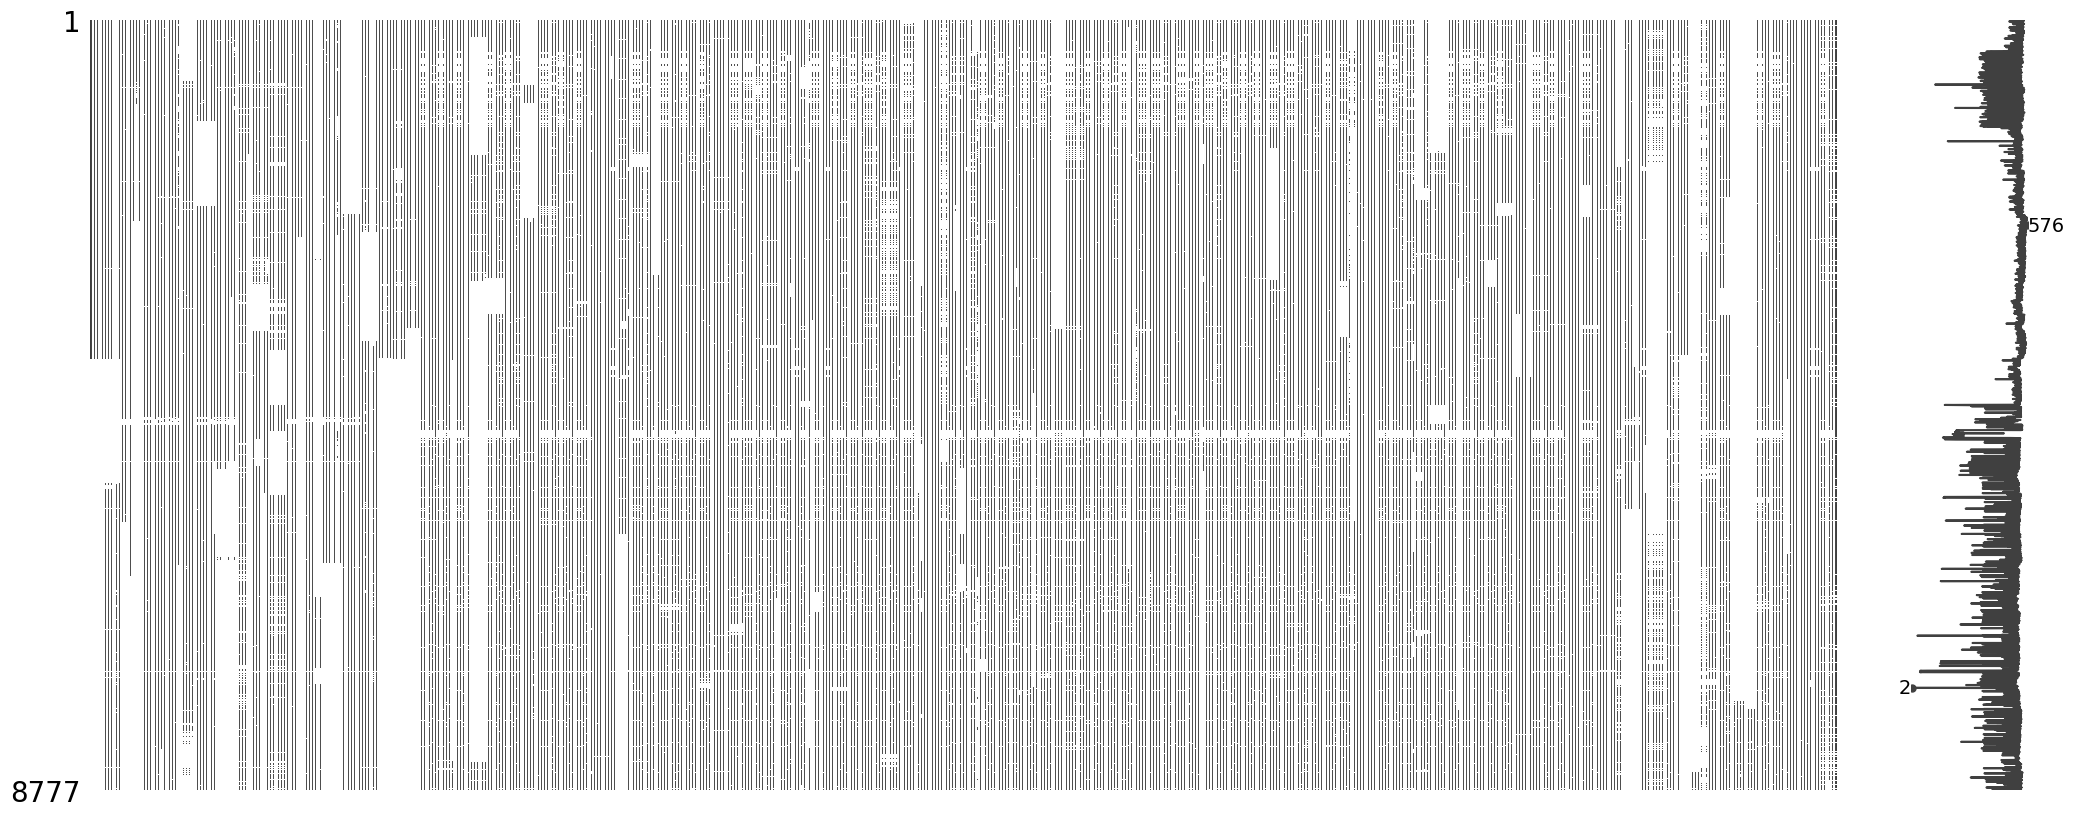

In [20]:
import missingno as msno

msno.matrix(dataset_cleaned_no_NaN)

White = valid data, Black = NaN

## What is the black line in the middle of the year?

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (8777).

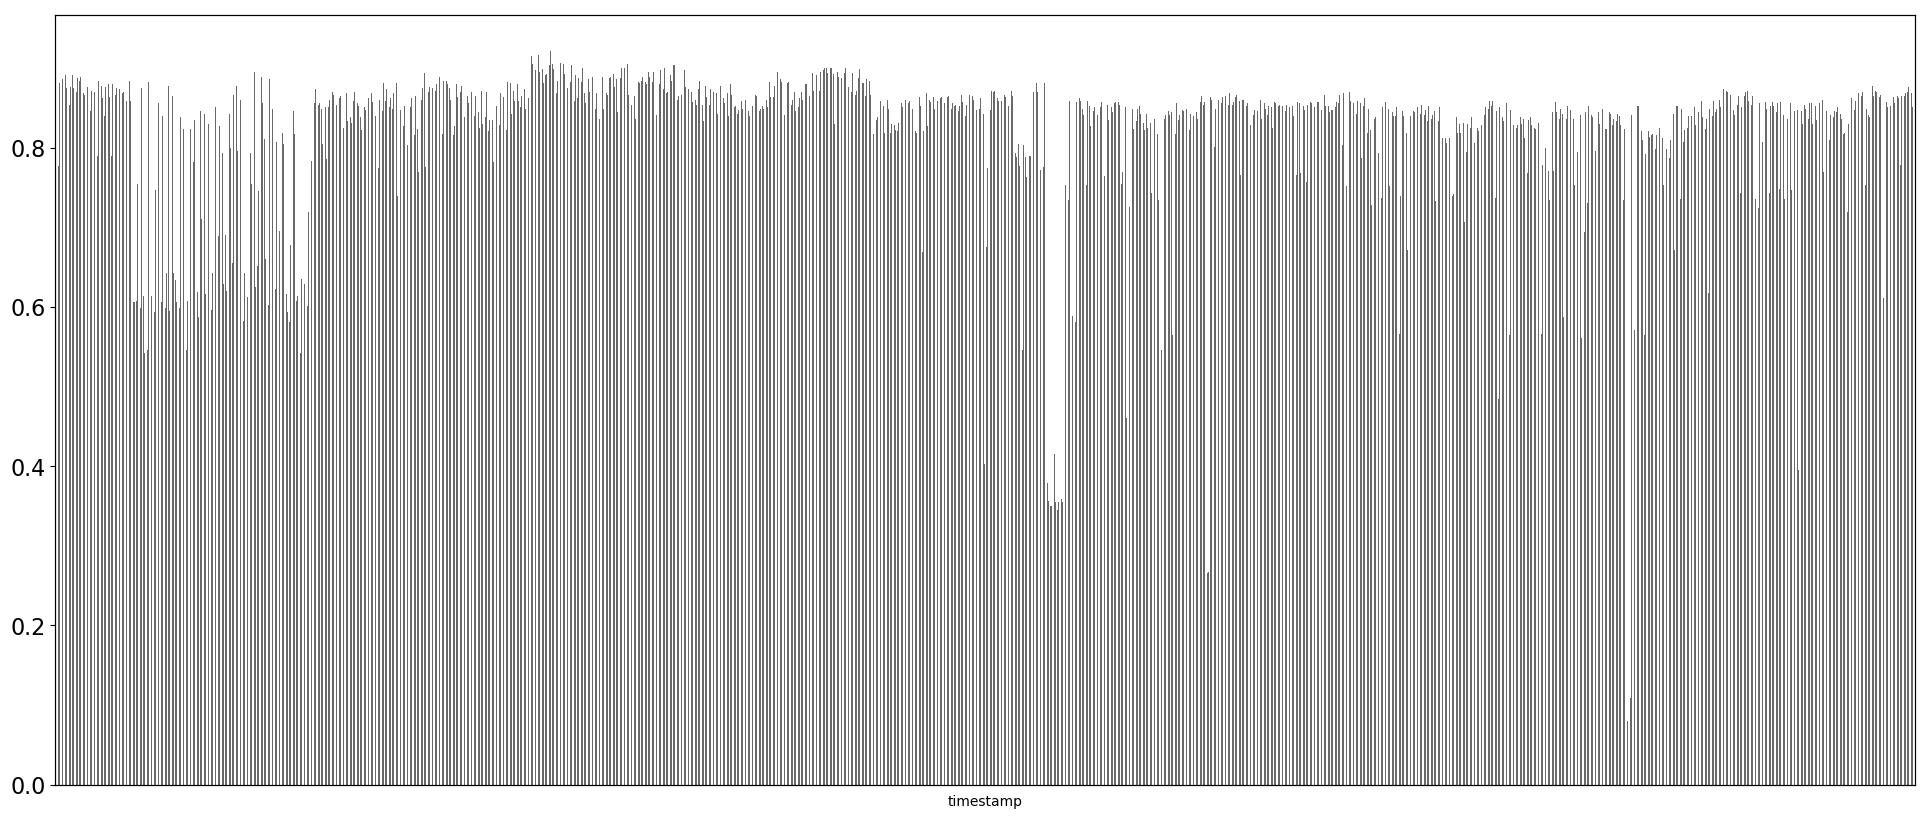

In [24]:
#loop all timesteps
#count num of NaN per timestep
dataset_cleaned_no_NaN_transpose = dataset_cleaned_no_NaN.T # t .. transpose (=switch rows and columns) -- cols = timesteps, rows = features
msno.bar(dataset_cleaned_no_NaN_transpose)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (744).

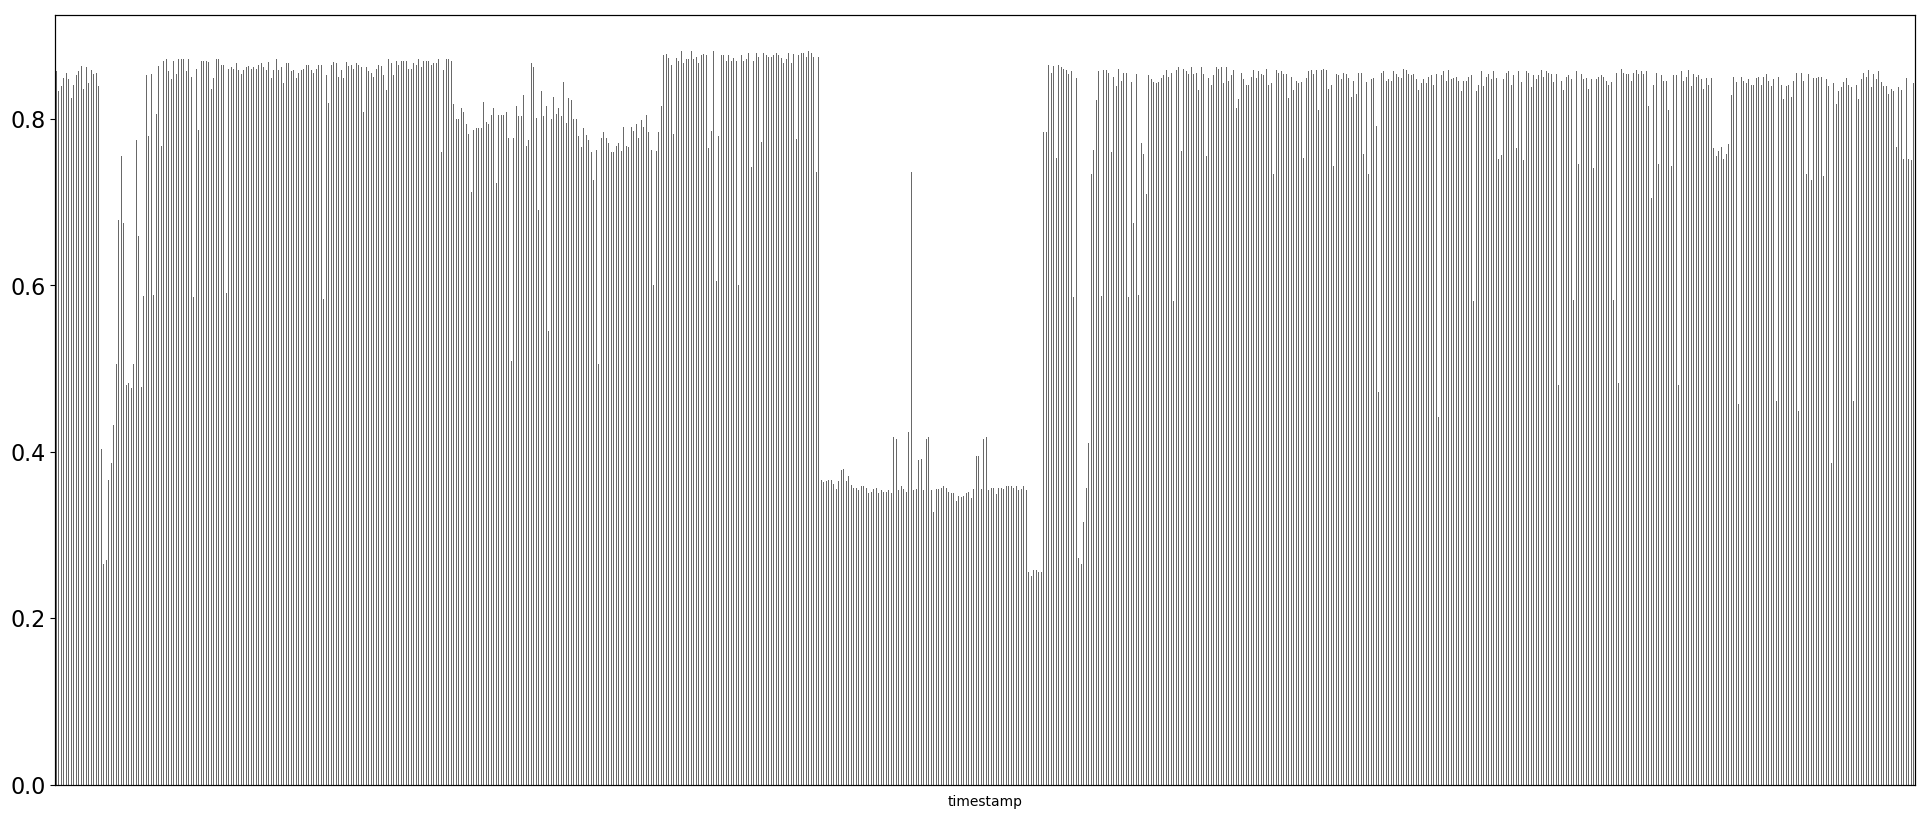

In [54]:
def create_timestep_list_subset(first_timestamp, last_timestamp):

    timestamps = list()
    while first_timestamp != last_timestamp:
        timestamps.append(first_timestamp)
        first_timestamp = first_timestamp + timedelta(hours=1)

    return timestamps


first_timestamp = datetime.strptime("2020-07-01 00:00", '%Y-%m-%d %H:%M')
last_timestamp = datetime.strptime("2020-08-01 00:00", '%Y-%m-%d %H:%M')

timestep_filter_list = create_timestep_list_subset(first_timestamp, last_timestamp)

dataset_cleaned_no_NaN_transpose_filtered = dataset_cleaned_no_NaN_transpose.filter(timestep_filter_list)
#dataset_cleaned_no_NaN_transpose_filtered
msno.bar(dataset_cleaned_no_NaN_transpose_filtered)

<AxesSubplot: xlabel='timestamp'>

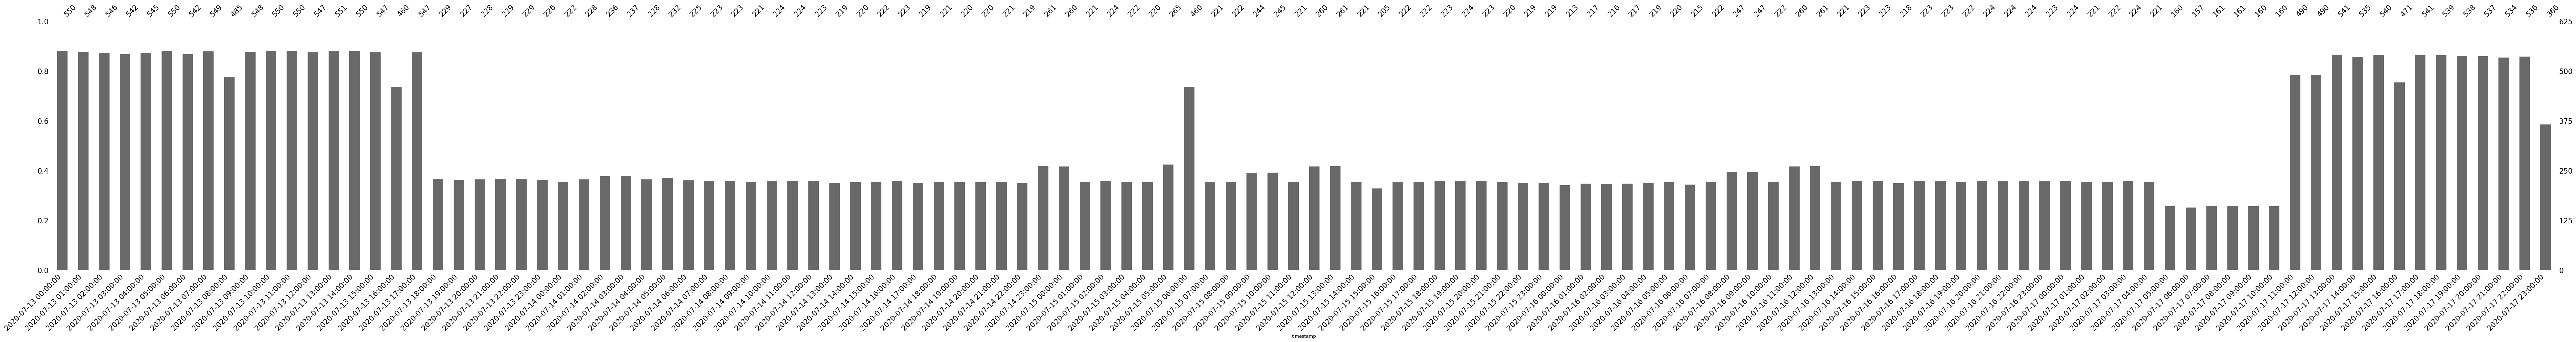

In [60]:
first_timestamp = datetime.strptime("2020-07-13 00:00", '%Y-%m-%d %H:%M')
last_timestamp = datetime.strptime("2020-07-18 00:00", '%Y-%m-%d %H:%M')

timestep_filter_list = create_timestep_list_subset(first_timestamp, last_timestamp)

dataset_cleaned_no_NaN_transpose_filtered = dataset_cleaned_no_NaN_transpose.filter(timestep_filter_list)
#dataset_cleaned_no_NaN_transpose_filtered
msno.bar(dataset_cleaned_no_NaN_transpose_filtered, labels=True, figsize=(100, 10))

----


ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (625).

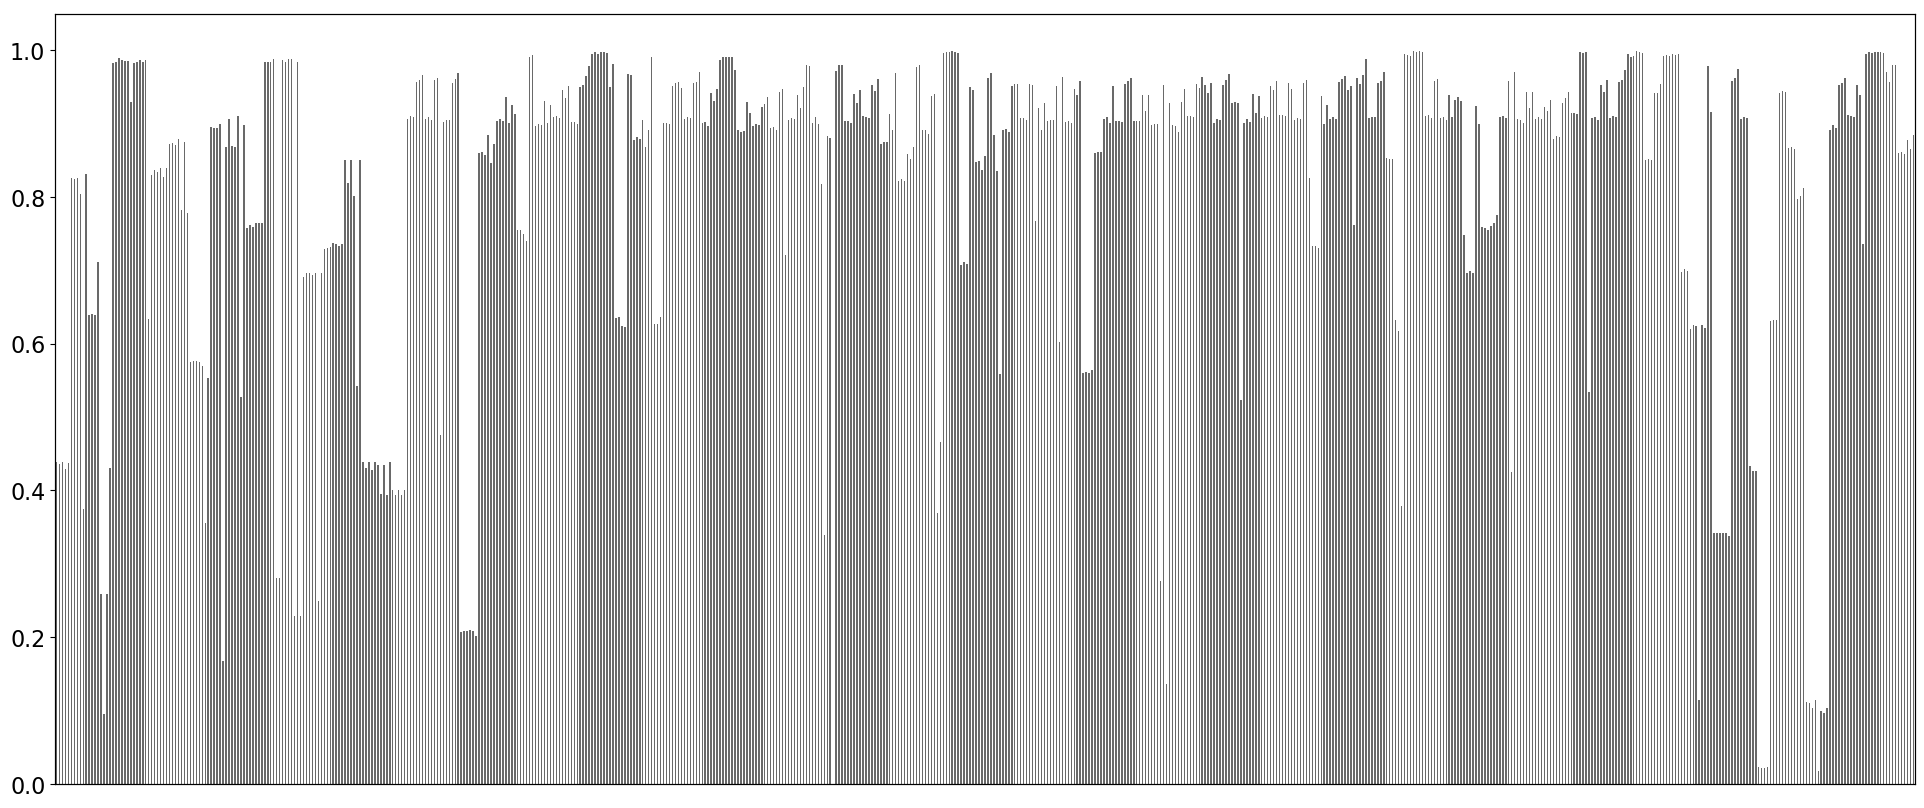

In [22]:
msno.bar(dataset_cleaned_no_NaN)

Interpretation of the graph above: The shorter the white bar, the smaller is the amount of valid data values in each column.


## Dendrogram
The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009


In [ ]:
msno.dendrogram(dataset_cleaned_no_NaN)